In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import argparse
import seaborn as sns
import time 
from AA import pytorchAA
from models import Discriminator, Generator, build_dataloader
from torchvision import transforms, utils
from torch import autograd as agd
torch.set_default_tensor_type('torch.cuda.DoubleTensor')

In [2]:
def train_D_on_actual(real_data, batch_size):
    real_decision = D(real_data)
    real_error = criterion(real_decision, torch.ones(batch_size, 1).to('cuda'))  # ones = true
    real_error.backward()


def train_D_on_generated(batch_size):
    noise = z.normal_(0,1)
    fake_data = G(noise)
    fake_decision = D(fake_data)
    fake_error = criterion(fake_decision, torch.zeros(batch_size, 1).to('cuda'))  # zeros = fake
    fake_error.backward()


def train_G(batch_size):
    noise = z.normal_(0,1)
    fake_data = G(noise)
    fake_decision = D(fake_data)
    error = criterion(fake_decision, torch.ones(batch_size, 1).to('cuda'))
    error.backward()
    return error.item()


def divide(fp, length_g):
    vG, vD = fp[0:length_g], fp[length_g:]    
    offset = 0
    for k, v in sizeG.items():
        G_dict[k].data.copy_(vG[offset: offset + v.numel()].view(v))
        offset = offset + v.numel()
    G.load_state_dict(G_dict)    
    offset = 0
    for k, v in sizeD.items():
        D_dict[k].data.copy_(vD[offset: offset + v.numel()].view(v))
        offset = offset + v.numel()
    D.load_state_dict(D_dict)
        
def combine():
    G_dict = dict(G.state_dict())
    D_dict = dict(D.state_dict())
    vl = []
    for key in G_dict:
        v = G_dict[key].view(-1)
        vl.append(v)
    for key in D_dict:
        v = D_dict[key].view(-1)
        vl.append(v) 
    fp = torch.cat(vl)    
    return fp

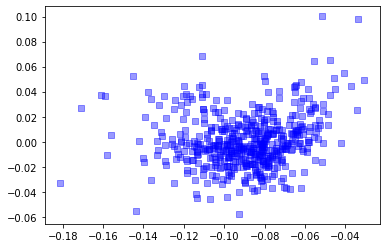

iteration  999


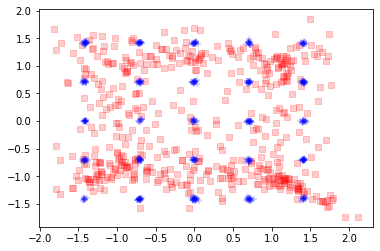

iteration  1999


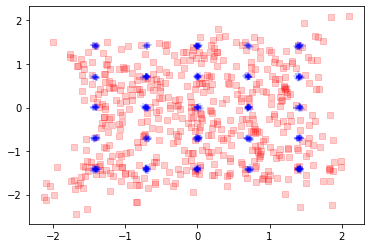

iteration  2999


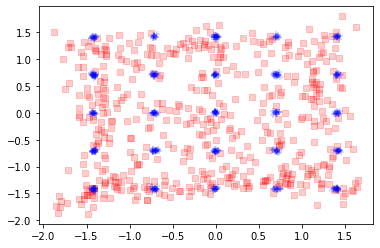

iteration  3999


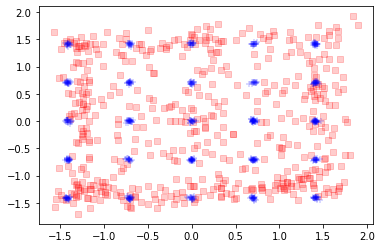

iteration  4999


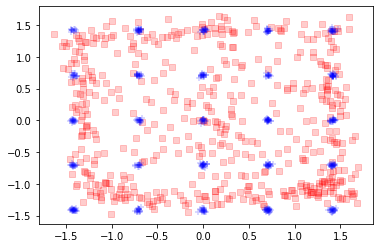

iteration  5999


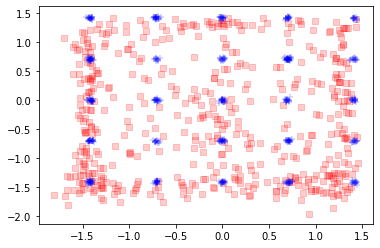

iteration  6999


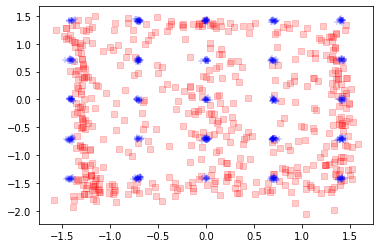

iteration  7999


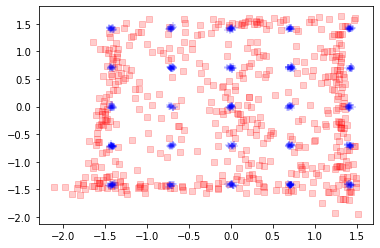

iteration  8999


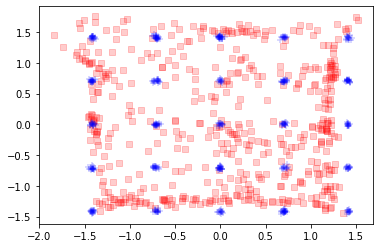

iteration  9999


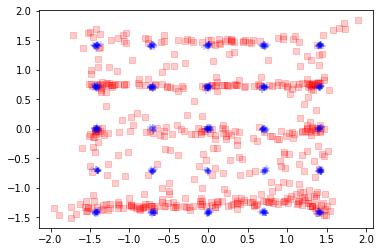

iteration  10999


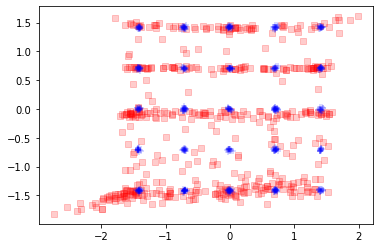

iteration  11999


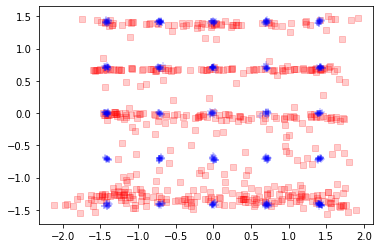

iteration  12999


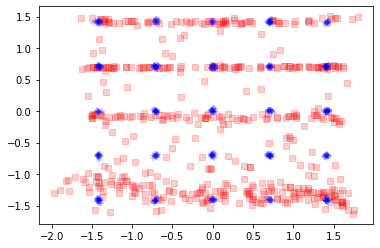

iteration  13999


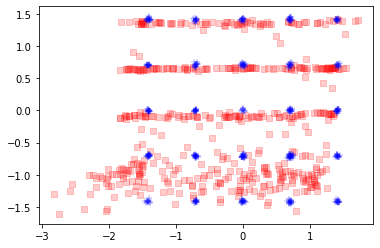

iteration  14999


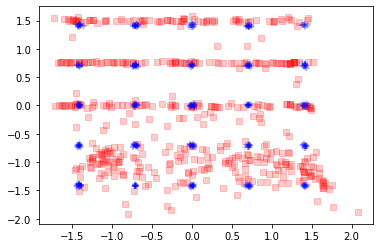

iteration  15999


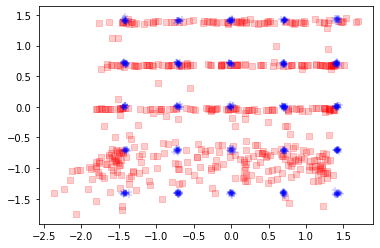

iteration  16999


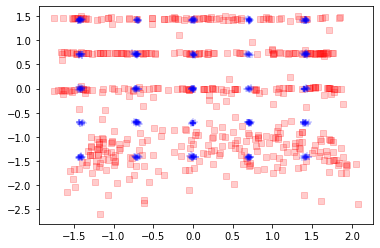

iteration  17999


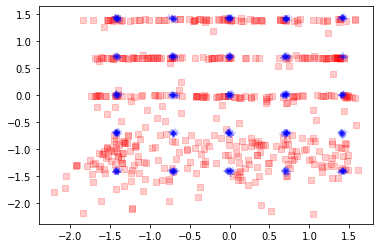

iteration  18999


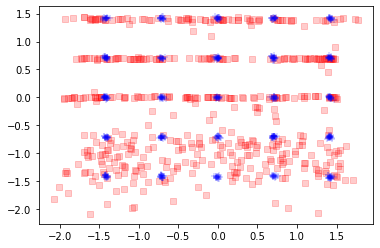

iteration  19999


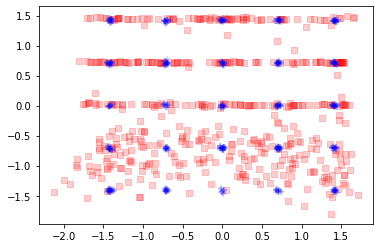

iteration  20999


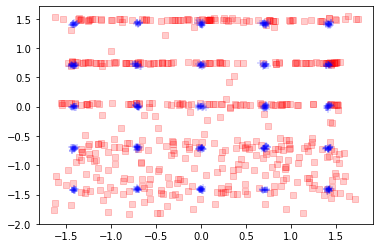

iteration  21999


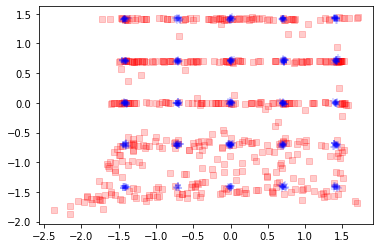

iteration  22999


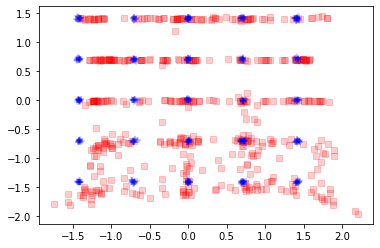

iteration  23999


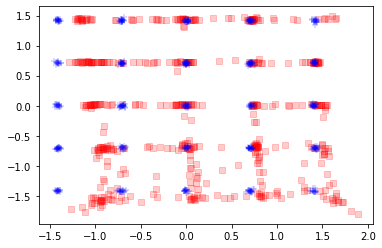

iteration  24999


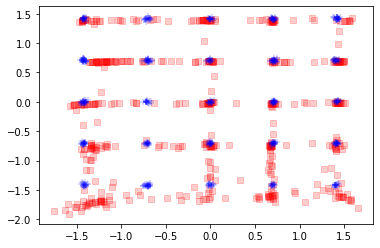

iteration  25999


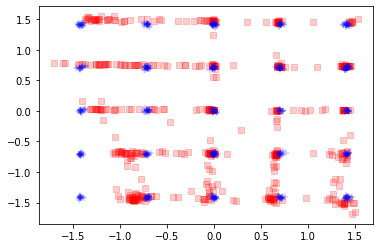

iteration  26999


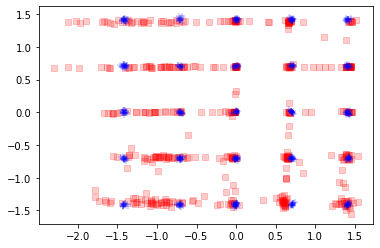

iteration  27999


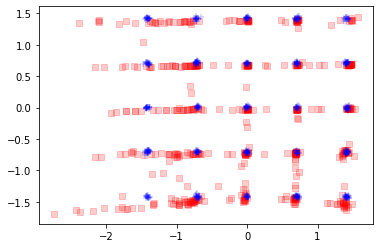

iteration  28999


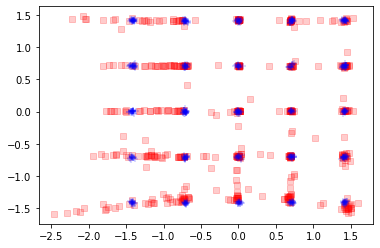

iteration  29999


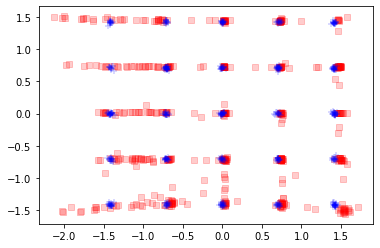

iteration  30999


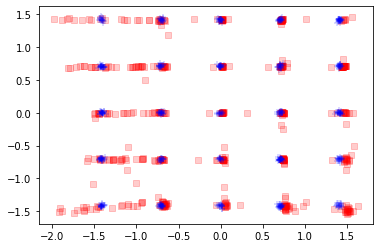

iteration  31999


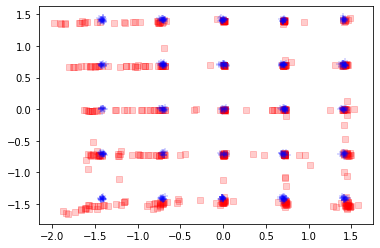

iteration  32999


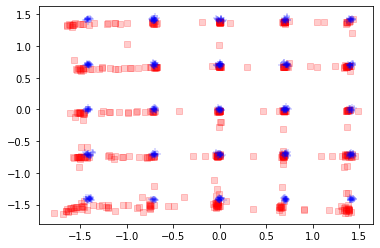

iteration  33999


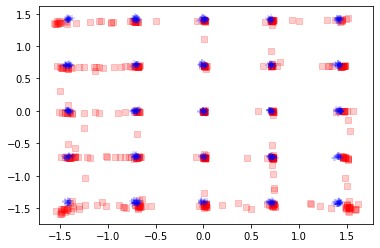

iteration  34999


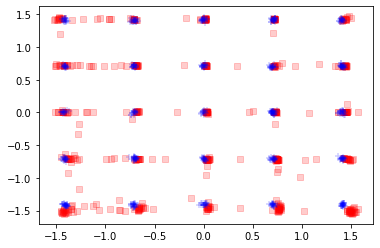

iteration  35999


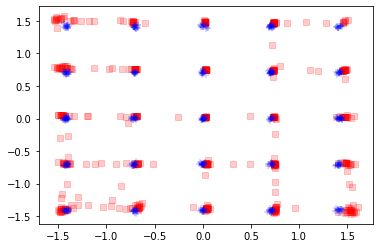

iteration  36999


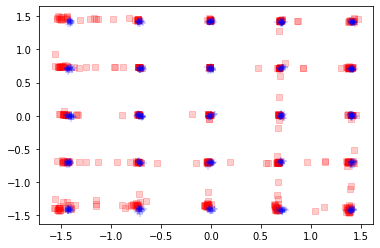

iteration  37999


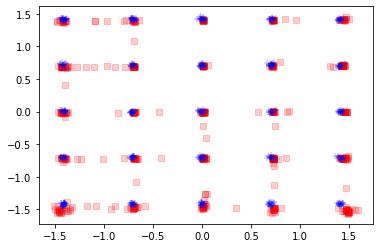

iteration  38999


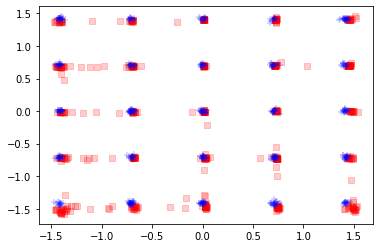

iteration  39999


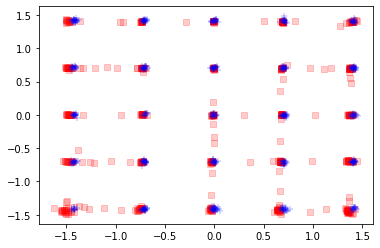

iteration  40999


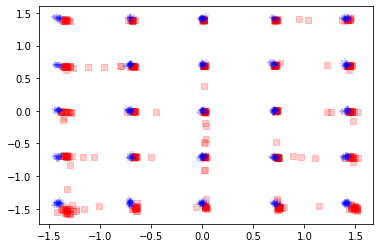

iteration  41999


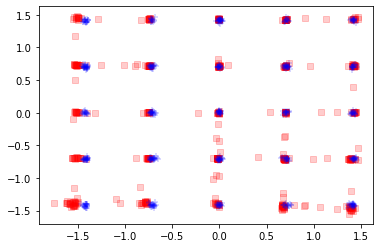

iteration  42999


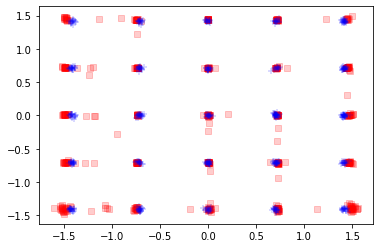

iteration  43999


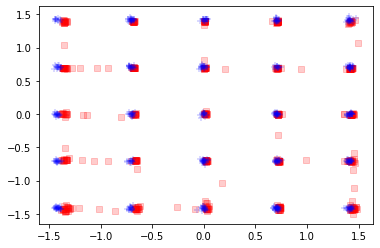

iteration  44999


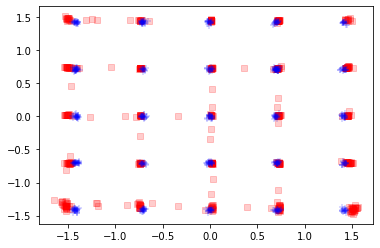

iteration  45999


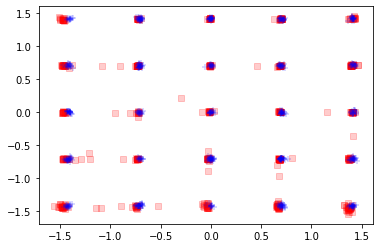

iteration  46999


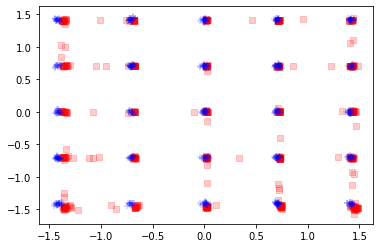

iteration  47999


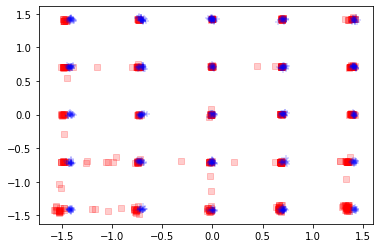

iteration  48999


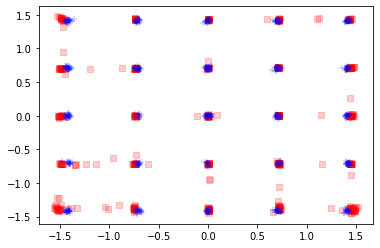

iteration  49999


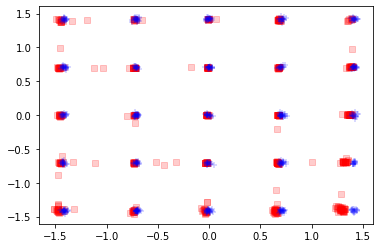

In [3]:
batch_size = 512
epoch = 50000
dataset = build_dataloader(batch_size, '25gaussians')
lr = 2e-4
print_interval = 1000
device='cuda'
dim = 8
G = Generator(input_size=dim, hidden_size=128).to('cuda')
D = Discriminator(input_size=2, hidden_size=128).to('cuda')
d_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(0.0, 0.9))
g_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(0.0, 0.9))
G_dict = dict(G.state_dict())
D_dict = dict(D.state_dict())
sizeG = {}
for key in G_dict:
    sizeG[key] = G_dict[key].shape
sizeD = {}
for key in D_dict:
    sizeD[key] = D_dict[key].shape
fp = combine()

sum_G = sum(v.numel() for _, v in G_dict.items())
sum_D = sum(v.numel() for _, v in D_dict.items())
sumGD = sum_G + sum_D

assert(len(fp) ==sumGD)

aa_wrk = pytorchAA(sumGD, 100, type2=True, reg=1) 
fixed_z = torch.DoubleTensor(batch_size, dim).normal_(0,1).to(device)
real_point = next(dataset)
real_data = torch.Tensor(real_point).to(device)
generated =  G(fixed_z).detach().cpu().numpy()

z = torch.DoubleTensor(batch_size, dim).to(device)
criterion = nn.BCELoss()
generated_list =[]
generated_list.append(generated)
table = []

plt.scatter(generated[:,0], generated[:,1], marker='s', color='blue',alpha=0.4)
plt.show()
start =  time.time()
for e in range(epoch):
    fpprev = fp.detach().clone()
    divide(fp, sum_G)  
    real_point = next(dataset)
    D.zero_grad()
    real_data = torch.Tensor(real_point).to(device)
    real_decision = D(real_data)
    real_error = criterion(real_decision, torch.ones(batch_size,1).to('cuda'))  # ones = true
    real_error.backward()

    noise = z.normal_(0,1)
    fake_data = G(noise)
    fake_decision = D(fake_data)
    fake_error = criterion(fake_decision, torch.zeros(batch_size,1).to('cuda'))  # zeros = fake
    fake_error.backward()

    noise = z.normal_(0,1)
    fake_data = G(noise)
    fake_decision = D(fake_data)
    error = criterion(fake_decision, torch.ones(batch_size,1).to('cuda'))
    error.backward()

    d_optimizer.step()
    G.zero_grad()
    loss=train_G(batch_size)
    g_optimizer.step()
    fp = combine()
    fp = aa_wrk.apply(fpprev, fp)
    if (e % print_interval) == (print_interval-1) :
        generated =  G(fixed_z).detach().cpu().numpy()
#         sns.kdeplot(x=generated[:,0], y=generated[:,1], cmap="Blues", shade=True, thresh=0 )
        print("iteration  %d"% e)
        plt.scatter(generated[:,0], generated[:,1], marker='s', color='red',alpha=0.2)
        plt.scatter(real_point[:,0], real_point[:,1], marker='+', color='blue',alpha=0.2)
        plt.show()
        generated_list.append(generated)
        start =  time.time()

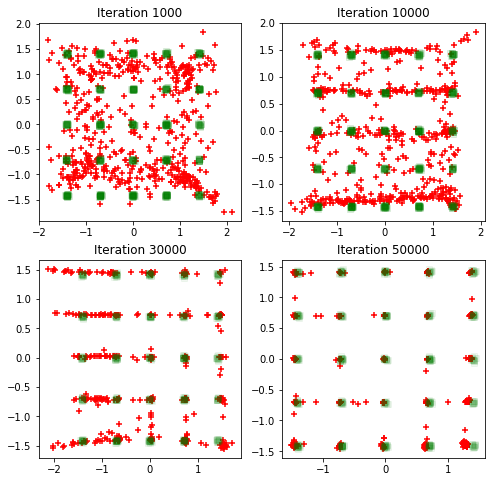

In [4]:
idx = [1, 10, 30, -1]
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.scatter(generated_list[idx[0]][:,0], generated_list[idx[0]][:,1], marker='+', color='red',alpha=1)
ax1.scatter(real_point[:,0], real_point[:,1], marker='s', color='green',alpha=0.1)
ax2.scatter(generated_list[idx[1]][:,0], generated_list[idx[1]][:,1], marker='+', color='red',alpha=1)
ax2.scatter(real_point[:,0], real_point[:,1], marker='s', color='green',alpha=0.1)
ax3.scatter(generated_list[idx[2]][:,0], generated_list[idx[2]][:,1], marker='+', color='red',alpha=1)
ax3.scatter(real_point[:,0], real_point[:,1], marker='s', color='green',alpha=0.05)
ax4.scatter(generated_list[idx[3]][:,0], generated_list[idx[3]][:,1], marker='+', color='red',alpha=1)
ax4.scatter(real_point[:,0], real_point[:,1], marker='s', color='green',alpha=0.05)
ax1.title.set_text('Iteration 1000')
ax2.title.set_text('Iteration 10000')
ax3.title.set_text('Iteration 30000')
ax4.title.set_text('Iteration 50000')
plt.show()

In [5]:
fig.savefig('25gauss.png')